# Ad Analysis

 We are providing the dataset please download it from this hyperlink ads.csv. Carefully look at the below dataset information.

A dataset with 200 observations on the following 4 variables. 

TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars) 
Radio: advertising dollars spent on Radio 
Newspaper: advertising dollars spent on Newspaper Response 
Sales: sales of a single product in a given market (in thousands of widgets)

Questions About the Advertising Data

a. Is there a relationship between ads and sales?
b. How strong is that relationship?
c. Which ad types contribute to sales?
d. What is the effect of each ad type of sales?
e. Given ad spending in a particular market, can sales be predicted?

(Note: The above questions should be answered along with the proof having programming code with efficient regression analysis techniques)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [37]:
data = pd.read_csv("ads.csv.csv",encoding="latin")
data.head(1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1


In [38]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


a. Is there a relationship between ads and sales? - Yes

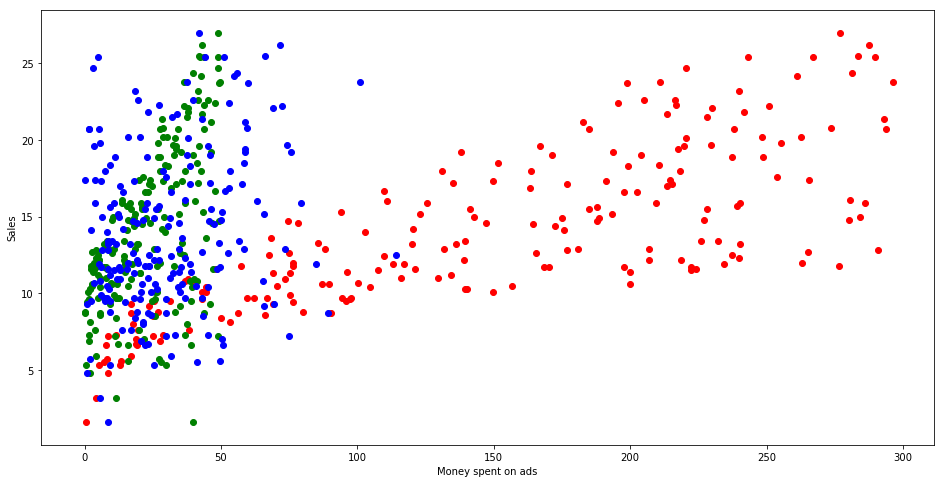

In [39]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['Sales'],
    c='red'
)
plt.scatter(
    data['Radio'],
    data['Sales'],
    c='green'
)
plt.scatter(
    data['Newspaper'],
    data['Sales'],
    c='blue'
)
plt.xlabel("Money spent on ads")
plt.ylabel("Sales")
plt.show()

b. How strong is that relationship? d. What is the effect of each ad type of sales?

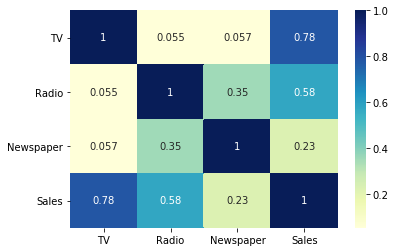

In [40]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

 c. Which ad types contribute to sales? - TV

In [41]:
X = data['TV']
y = data['Sales']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

e. Given ad spending in a particular market, can sales be predicted? - yes

In [43]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    6.989666
TV       0.046497
dtype: float64

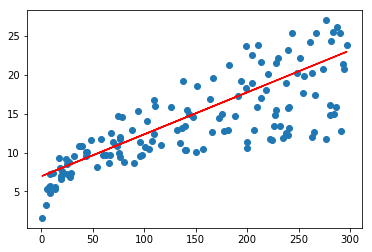

In [44]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [45]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

/home/csk/anaconda/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


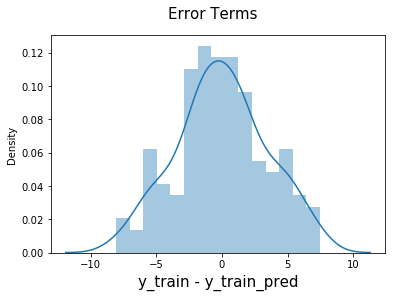

In [46]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)             
plt.xlabel('y_train - y_train_pred', fontsize = 15)    
plt.show()

In [47]:
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327016

In [49]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.59429872677833

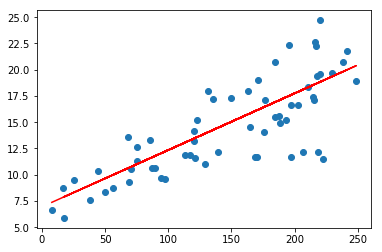

In [50]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()